In [2]:
# https://d2l.ai/chapter_multilayer-perceptrons/mlp-concise.html
import tensorflow as tf
import numpy as np
import pandas as pd
from google.colab import drive
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from google.colab import drive
import os
import shutil 
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# Regression Example With Boston Dataset: Standardized and Larger
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
import matplotlib.pyplot as plt

In [4]:
# You can visualize the results with a confusion matrix.
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_classified, y_true):
  # Compute confusion matrix
  c_mat = np.zeros((y_true.shape[0],y_true.shape[0]))
  for i in range(len(y_true)):
    c_mat[y_classified[i], y_true[i] ] += 1

  group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
  labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
  labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

  plt.figure(figsize=(12,10))
  sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
  plt.title("Confusion Matrix")
  plt.ylabel('Output Class')
  plt.xlabel('Target Class')

In [5]:
drive.mount('/content/drive')
# feel free to edit this cell to work with your local or colab directory
with open('/content/drive/My Drive/ECE 539/ECE 539 Project/result.csv', 'r') as f: 
  df= pd.read_csv(f)
df = df.drop(['Unnamed: 0', 'Date', 'gme', 'amc', 'Time', 'High', 'Low', 'yesterday_open', '2before_open', '3before_open', '4before_open', '5before_open', '6before_open', '7before_open'], axis=1)
df = df.fillna(df.mean(axis=0), axis=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
arr = pd.DataFrame.to_numpy(df)
X = arr[:,:13]
y = arr[:,13:21]
X = preprocessing.normalize(X)

# features = 1
# X = X.reshape((X.shape[0], X.shape[1], features))

In [9]:
from sklearn.metrics import r2_score

In [10]:
# partition into training and validation set at 80/20 division
def larger_model():
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(6, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
y_predict = np.zeros((y_test.shape[0], y_test.shape[1]))

for i in range(len(y[0])):
  # evaluate model with standardized dataset
  estimators = []
  estimators.append(('standardize', StandardScaler()))
  estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=100, batch_size=15, verbose=0)))
  pipeline = Pipeline(estimators)
  kfold = KFold(n_splits=3)
  # results = cross_val_score(pipeline, X_train, y_train[:,i], cv=kfold)
  pipeline.fit(X_train, y_train[:,i])
  yhat = pipeline.predict(X_test)
  for j in range(len(yhat)):
    y_predict[j][i] = yhat[j] 
  print("MSE :", np.square(np.subtract(y_test[:,i],yhat)).mean())
  print("R2 :", r2_score(yhat,y_test[:,i]))
  # print("(%f): Iteration Larger: %.2f (%.2f) MSE" % (i+1, results.mean(), results.std()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


MSE : 759.113285983345
R2 : 0.7519184987227544


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


MSE : 12.667567540369983
R2 : 0.9864138274160777


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


MSE : 134.52728893157592
R2 : 0.9898120043702783


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


MSE : 493.6232390621132
R2 : 0.9588983286304588


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


MSE : 264.4513096654318
R2 : 0.9844588986338494


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


MSE : 183.6242355043426
R2 : 0.9885012357069656


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


MSE : 578.9299640704265
R2 : 0.9668549602772667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


MSE : 421.0198504701741
R2 : 0.9770764765763941


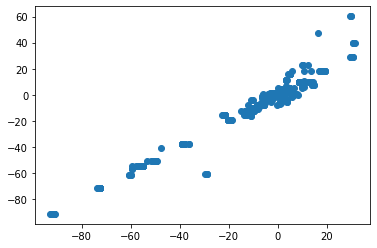

In [12]:
plt.scatter(y_predict[:,1], y_test[:,1])

In [ ]:
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.
